# Especialização em Ciência de Dados - PUC-Rio
## Machine Learning - Prof. Tatiana Escovedo
### Exercício 1: Análise Exploratória e Pré-processamento de Dados
### Dataset: Wine Quality

### Integrantes: 
- Allan Dominguez Strougo
- Amanda Mograbi
- Ana Caroline Gomes Vargas
- Ramon Dantas Vaqueiro
- Samara S. de Araújo Sobreira
- Thais Cortizo
- Victor Hugo Diniz

### Objetivo do Dataset

Entender as amostras de vinho branco no qual as entradas incluem testes objetivos, por exemplo, valores de PH e a saída é baseada em dados sensoriais. Cada especialista avaliou a qualidade do vinho entre 0 (muito ruim) e 10 (muito excelente).

### Significado das Variáveis

#### fixed acidity / Acidez Fixa
A acidez de um vinho é essencial para identificar o aroma e sabor, contribuindo para sua conservação e envelhecimento.
#### volatile acidity / Acidez Volátil
A acidez volátil é formada por várias estirpes de bactérias acéticas que, em contacto com o oxigénio, degradam o álcool do vinho.
#### citric acid / Ácido Cítrico
A acidez volátil é formada por várias estirpes de bactérias acéticas que, em contacto com o oxigénio, degradam (oxidam) o álcool do vinho em acetaldeído e o acetaldeído em ácido acético, água e dióxido de carbono.
#### residual sugar / Açúcar Residual
A concentração residual de açúcar refere-se à quantidade de sólidos de açúcar em um determinado volume de vinho após o final da fermentação. A concentração residual de açúcar é expressa em gramas por litro. Por exemplo, um vinho com açúcar residual de 0,2% contém dois gramas de açúcar em um litro de vinho. 
#### chlorides / Calorias
#### free sulfur dioxide / Dióxido de Enxofre Livre 
Os sulfitos são muito usados na indústria de alimentos como conservantes, por sua ação antioxidante e bactericida.
#### total sulfur dioxide / Dióxido de Enxofre Total
Os sulfitos são muito usados na indústria de alimentos como conservantes, por sua ação antioxidante e bactericida.
#### density / Densidade
A densidade do vinho está relacionada principalmente ao seu teor alcoólico e de açúcares residuais.
#### pH / PH
Em termos simples, ele mede a força da acidez.
#### sulphates / Sulfatos
Os sulfitos são muito usados na indústria de alimentos como conservantes, por sua ação antioxidante e bactericida.
#### alcohol / Álcool 
O vinho deve possuir teor alcoólico de 8,6% a 14% em volume.
#### quality / Qualidade
A nota que os especialistas de vinho deram para o vinho.

# Bibliotecas

Principais:

- Manipulação de Dados: Pandas e NumPy
- Visualização de Dados: Seaborn e Plotly
- Machine Learning: Scikit-Learn
    
Outras IDEs conhecidas (Todos vêm junto com a plataforma Anaconda - https://www.anaconda.com/):
- PyCharm
- Jupyter Notebook
- JupterLab
- Spyder

In [15]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import numpy as np

#import missingno as ms                          # para tratamento de missings
from sklearn.preprocessing import MinMaxScaler   # para normalização
from sklearn.preprocessing import StandardScaler # para padronização
from sklearn.preprocessing import OrdinalEncoder # para ordinal encoding
from sklearn.preprocessing import OneHotEncoder  # para one-hot encoding e dummies

from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste
from sklearn.metrics         import confusion_matrix # para a exibição da matriz de confusão do modelo
from sklearn.metrics         import accuracy_score   # para a exibição da acurácia do modelo
from sklearn.svm             import SVC              # para utilizar o algoritmo SVM

# Carregando a Base de Dados

In [2]:
atributos = ['acidez_fixa', 'acidez_volatil', 'acido_citrico', 'acucar_residual', 'calorias', 'dioxido_de_enxofre_livre', 'dioxido_de_enxofre_total',
             'densidade', 'ph', 'sulfatos', 'alcool', 'qualidade']

In [3]:
base = pd.read_csv("winequality-white.csv", 
                   delimiter=';', names = atributos, header=0)

In [4]:
print("Dataset contém {} linhas".format(len(base)))

Dataset contém 4898 linhas


In [5]:
base.head(5)

acidez_fixa  acidez_volatil  acido_citrico  acucar_residual  calorias  \
0          7.0            0.27           0.36             20.7     0.045   
1          6.3            0.30           0.34              1.6     0.049   
2          8.1            0.28           0.40              6.9     0.050   
3          7.2            0.23           0.32              8.5     0.058   
4          7.2            0.23           0.32              8.5     0.058   

   dioxido_de_enxofre_livre  dioxido_de_enxofre_total  densidade    ph  \
0                      45.0                     170.0     1.0010  3.00   
1                      14.0                     132.0     0.9940  3.30   
2                      30.0                      97.0     0.9951  3.26   
3                      47.0                     186.0     0.9956  3.19   
4                      47.0                     186.0     0.9956  3.19   

   sulfatos  alcool  qualidade  
0      0.45     8.8          6  
1      0.49     9.5          6  
2      0.44    10.1          6  
3      0.40     9.9          6  
4      0.40     9.9          6

# Estatísticas Descritivas

In [6]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   acidez_fixa               4898 non-null   float64
 1   acidez_volatil            4898 non-null   float64
 2   acido_citrico             4898 non-null   float64
 3   acucar_residual           4898 non-null   float64
 4   calorias                  4898 non-null   float64
 5   dioxido_de_enxofre_livre  4898 non-null   float64
 6   dioxido_de_enxofre_total  4898 non-null   float64
 7   densidade                 4898 non-null   float64
 8   ph                        4898 non-null   float64
 9   sulfatos                  4898 non-null   float64
 10  alcool                    4898 non-null   float64
 11  qualidade                 4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


Todas as variáveis apresentam valores de média e mediana próximos, o que pode indicar que possivelmente as variáveis sigam uma distribuição aproximadamente normal. Para validar essa suposição, faremos gráficos de densidade que ajudarão na visualização da hipótese. 'Free sulfur dioxide' e 'total sulfur dioxide' apresentam valores de máximo altos comparados aos demais valores, o que pode indicar presença de outliers. Outro ponto relevante é que não existem missings na base.

Escrever mais sobre este comando!

In [7]:
base.describe()

acidez_fixa  acidez_volatil  acido_citrico  acucar_residual  \
count  4898.000000     4898.000000    4898.000000      4898.000000   
mean      6.854788        0.278241       0.334192         6.391415   
std       0.843868        0.100795       0.121020         5.072058   
min       3.800000        0.080000       0.000000         0.600000   
25%       6.300000        0.210000       0.270000         1.700000   
50%       6.800000        0.260000       0.320000         5.200000   
75%       7.300000        0.320000       0.390000         9.900000   
max      14.200000        1.100000       1.660000        65.800000   

          calorias  dioxido_de_enxofre_livre  dioxido_de_enxofre_total  \
count  4898.000000               4898.000000               4898.000000   
mean      0.045772                 35.308085                138.360657   
std       0.021848                 17.007137                 42.498065   
min       0.009000                  2.000000                  9.000000   
25%       0.036000                 23.000000                108.000000   
50%       0.043000                 34.000000                134.000000   
75%       0.050000                 46.000000                167.000000   
max       0.346000                289.000000                440.000000   

         densidade           ph     sulfatos       alcool    qualidade  
count  4898.000000  4898.000000  4898.000000  4898.000000  4898.000000  
mean      0.994027     3.188267     0.489847    10.514267     5.877909  
std       0.002991     0.151001     0.114126     1.230621     0.885639  
min       0.987110     2.720000     0.220000     8.000000     3.000000  
25%       0.991723     3.090000     0.410000     9.500000     5.000000  
50%       0.993740     3.180000     0.470000    10.400000     6.000000  
75%       0.996100     3.280000     0.550000    11.400000     6.000000  
max       1.038980     3.820000     1.080000    14.200000     9.000000

#### Contagem das Qualidades

A base apresenta um total de 4898 instâncias e 11 variáveis de entrada. O campo targe apresenta 7 valores diferentes de qualidade atribuídas aos vinhos analisados. Algo interessante que poderia ser feito em outro momento, seria criar uma nova variável target com menos classes e verificar se agrupar as notas originais traria ganho nos resultados.

In [8]:
base.groupby('qualidade').size()

qualidade
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
dtype: int64

Falar mais sobre este comando!!!!!!!!!!!!!!!!!!!!!!!

Verificar a simetria (skew) da distribuição de dataset de cada atributo (assumindo que a distribuição é normal). Se o coeficiente resultante for:

- Maior que 0: a distribuição é assimétrica positiva (maior à esquerda e menor à direita).
- Menor que 0: a distribuição é assimétrica negativa (maior à direita e menor à esquerda).
- Igual a 0: a distribuição é simétrica.
- Próximas de 2 ou -2: São distribuições próximas a Exponencial

**OBS: Esta informação é relevante porque muitos algoritmos de Machine Learning consideram que os dataset seguem uma distribuição normal. Conhecer a simetria dos dataset é importante para que seja realizado algum tratamento nos dados, se necessário.**

In [9]:
base.skew()

acidez_fixa                 0.647751
acidez_volatil              1.576980
acido_citrico               1.281920
acucar_residual             1.077094
calorias                    5.023331
dioxido_de_enxofre_livre    1.406745
dioxido_de_enxofre_total    0.390710
densidade                   0.977773
ph                          0.457783
sulfatos                    0.977194
alcool                      0.487342
qualidade                   0.155796
dtype: float64

# Análise Exploratória dos Dados

#### Correlação Positiva
- O áçucar residual é correlacionado positivamente com a densidade, ou seja, a cada uma unidade a mais de áçucar residual, a densidade aumenta cerca de 0,84.
- O Dióxido de Enxofre Total é correlacionado positivamente com a Dióxido de Enxofre Livre, a cada uma unidade a mais de Dióxido de Enxofre Total, o Dióxido de Enxofre Livre aumenta cerca de 0,62.
- O Dióxido de Enxofre Total é correlacionado positivamente com a Densidade, a cada uma unidade a mais de Dióxido de Enxofre Total, a Densidade aumenta cerca de 0,53.

#### Correlação Negativa
- A variável Densidade é correlacionada negativamente com o Álcool, ou seja, a cada uma unidade a mais de Densidade, o álcool diminiu cerca de -0,78.

<AxesSubplot:>

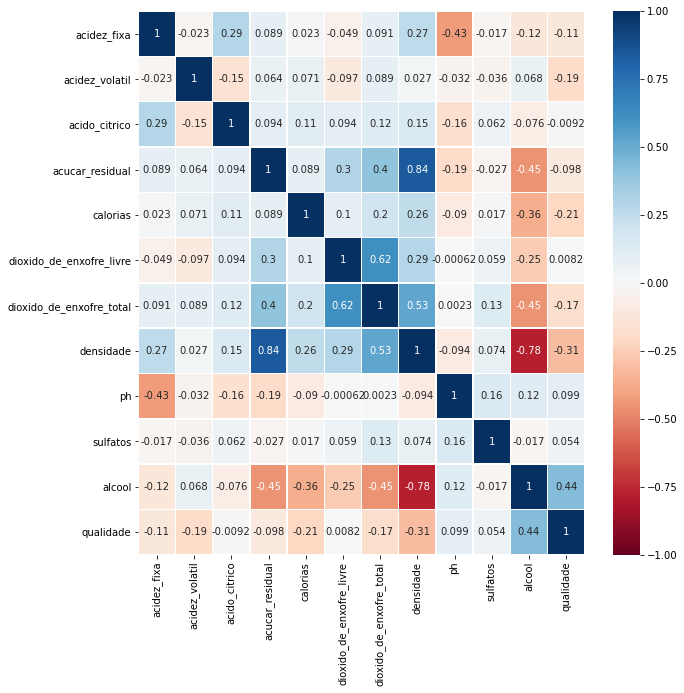

In [10]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(base.corr(), annot=True, cmap='RdBu', vmin=-1.0, vmax=1.0, linewidths=.5, ax=ax)

# Histogramas

Explicar se são normais ou exponenciais!!!!!!!

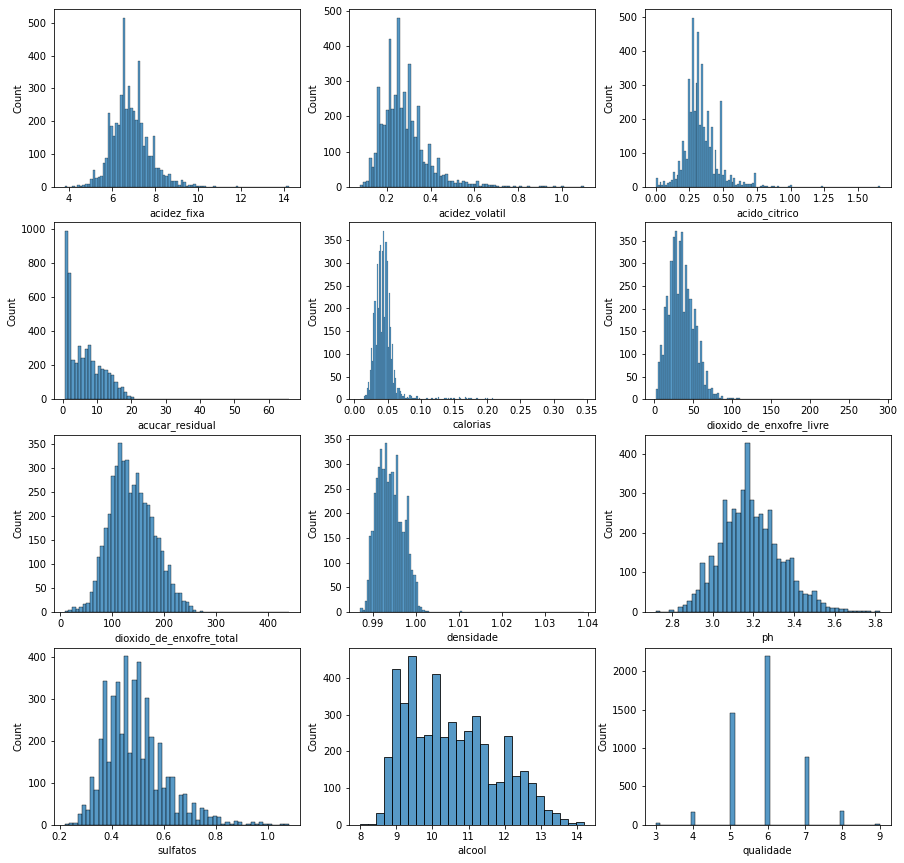

In [11]:
fig, axes = plt.subplots(4, 3, sharex=False, figsize=(15,15))
i=0
for atr in base.columns:
    sns.histplot(ax=axes[i//3, i%3], data= base[atr])
    i+=1
    if atr =='qualidade':
        break
    

In [12]:
sns.color_palette("Set2")
sns.set_palette("Set2")

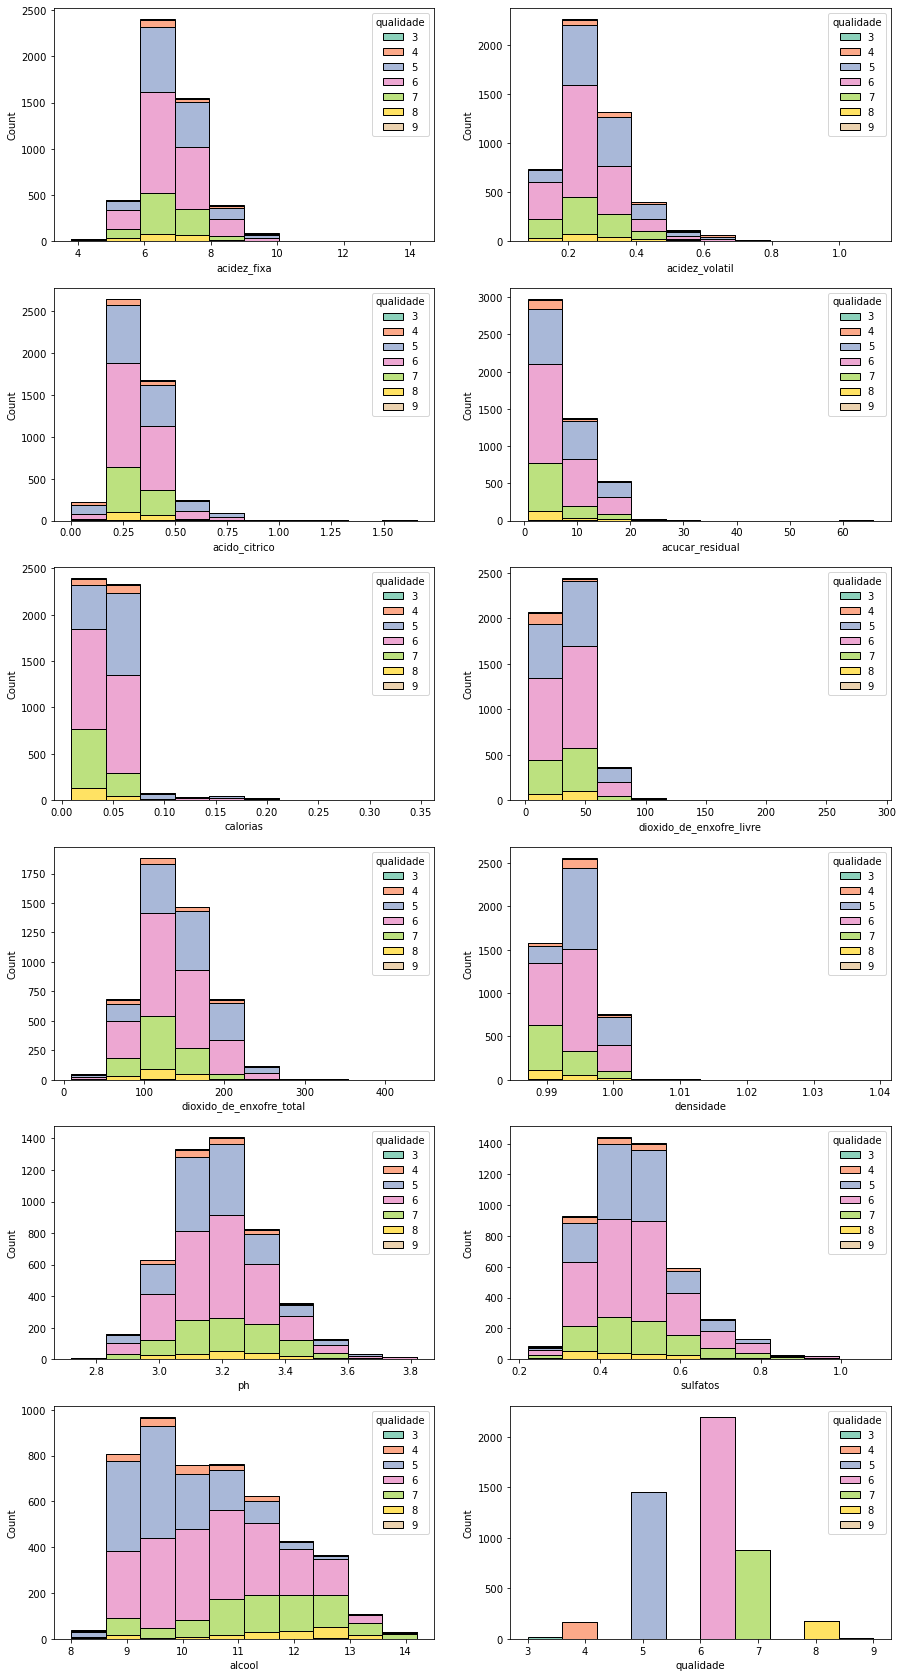

In [13]:
fig, axes = plt.subplots(6, 2, sharex=False, figsize=(15,30))

i=0
for atr in base.columns:
    sns.histplot(ax=axes[i//2, i%2], data=base, x=atr, bins=10, hue='qualidade',multiple="stack", palette="Set2" )
    i+=1
    

# Box Plots

In [14]:
fig = go.Figure()
fig.add_trace(go.Box(y=base['acidez_volatil'], name='Acidez Volátil',
                marker_color = 'darkblue', boxmean=True, boxpoints='suspectedoutliers'))

fig.add_trace(go.Box(y=base['acido_citrico'], name = 'Ácido Cítrico',
                marker_color = 'darkblue', boxmean=True, boxpoints='suspectedoutliers'))

fig.add_trace(go.Box(y=base['sulfatos'], name = 'Sulfatos',
                marker_color = 'darkblue', boxmean=True, boxpoints='suspectedoutliers'))

fig.update_layout(title_text="Ácidos e Sulfatos dos Vinhos Brancos", template="simple_white")
fig.show()

Em média, os vinhos brancos possuem cerca de 0,043 calorias, porém existem vinhos com calorias que podem chegar até a 0.35.

In [15]:
fig = go.Figure()
fig.add_trace(go.Box(y=base['calorias'], name = 'Calorias',
                marker_color = 'darkblue', boxmean=True, boxpoints='suspectedoutliers'))

fig.update_layout(title_text="Calorias dos Vinhos Brancos", template="simple_white")
fig.show()

In [16]:
fig = go.Figure()
fig.add_trace(go.Box(y=base['densidade'], name = 'Densidade',
                marker_color = 'darkblue', boxmean=True, boxpoints='suspectedoutliers'))

fig.update_layout(title_text="Densidade dos Vinhos Brancos", template="simple_white")
fig.show()

Os vinhos brancos possuem maior quantidade de Dióxido de Enxofre Total do que o Dióxido de Enxofre Livre, em média. 
- O Dióxido de Enxofre Total tem uma média de 134, mas pode chegar a 440 (outlier) 
- O Dióxido de Enxofre Livre tem uma média de 34, mas pode chegar a 289 (outlier) 

In [17]:
fig = go.Figure()
fig.add_trace(go.Box(y=base['dioxido_de_enxofre_livre'], name='Dióxido de Enxofre Livre',
                marker_color = 'darkblue', boxmean=True, boxpoints='suspectedoutliers'))

fig.add_trace(go.Box(y=base['dioxido_de_enxofre_total'], name = 'Dióxido de Enxofre Total',
                marker_color = 'darkblue', boxmean=True, boxpoints='suspectedoutliers'))

fig.update_layout(title_text="Dióxidos de Enxofre dos Vinhos Brancos", template="simple_white")
fig.show()

Os vinhos possuem uma acidez fixa em média de 6.8, mas existe vinhos que podem chegar a uma acidez fixa de aproximadamente o dobro, 14.2.

In [18]:
fig = go.Figure()
fig.add_trace(go.Box(y=base['acidez_fixa'], name='Acidez Fixa',
                marker_color = 'darkblue', boxmean=True, boxpoints='suspectedoutliers'))

fig.add_trace(go.Box(y=base['alcool'], name = 'Álcool',
                marker_color = 'darkblue', boxmean=True, boxpoints='suspectedoutliers'))

fig.update_layout(title_text="Acidez e Álcool dos Vinhos Brancos", template="simple_white")
fig.show()

In [19]:
fig = go.Figure()
fig.add_trace(go.Box(y=base['ph'], name = 'Ph',
                marker_color = 'darkblue', boxmean=True, boxpoints='suspectedoutliers'))

fig.update_layout(title_text="Ph dos Vinhos Brancos", template="simple_white")
fig.show()

A quantidade média de açúcar residual é de 5.2, porém existe um vinho outlier com 65 de açúcar.

In [20]:
fig = go.Figure()
fig.add_trace(go.Box(y=base['acucar_residual'], name = 'Acúçar Residual',
                marker_color = 'darkblue', boxmean=True, boxpoints='suspectedoutliers'))

fig.update_layout(title_text="Áçucar Residual dos Vinhos Brancos", template="simple_white")
fig.show()

# Classificando a Variável Qualidade em uma Classe: Baixa, Média, Alta

Baseando-se nas categorias oficiais de notas de vinhos, e que pode ser acessada pelo link (https://www.wine.com.br/winepedia/sommelier-wine/pontuados/) , optamos por classificar os vinhos nas seguintes categorias:

No sistema de 100 pontos, as pontuações são divididas nas seguintes categorias:
- Excepcionais – **96 a 100**
- Excelentes – **90 a 95**
- Muito bons – **80 a 89**
- Médios – **70 a 79**
- Abaixo da média – **60 a 69**
- Inferiores e inaceitáveis – **50 a 59**

In [44]:
def categoriza_qualidade(qualidade):
    if qualidade >= 96:
        return 'Excepcionais'
    elif qualidade >= 90 and qualidade <= 95:
        return 'Excelentes'
    elif qualidade >= 80 and qualidade <= 89:
        return 'Muito Bons'
    elif qualidade >= 70 and qualidade <= 79:
        return 'Médios'
    elif qualidade >= 60 and qualidade <= 69:
        return 'Abaixo da Média'
    else:
        return 'Inferiores e inaceitáveis'

In [45]:
base['cat_qualidade'] = base['qualidade'].apply(categoriza_qualidade)

In [46]:
base.groupby('cat_qualidade').mean()

acidez_fixa  acidez_volatil  acido_citrico  \
cat_qualidade                                                           
Inferiores e inaceitáveis     6.854788        0.278241       0.334192   

                           acucar_residual  calorias  \
cat_qualidade                                          
Inferiores e inaceitáveis         6.391415  0.045772   

                           dioxido_de_enxofre_livre  dioxido_de_enxofre_total  \
cat_qualidade                                                                   
Inferiores e inaceitáveis                 35.308085                138.360657   

                           densidade        ph  sulfatos     alcool  qualidade  
cat_qualidade                                                                   
Inferiores e inaceitáveis   0.994027  3.188267  0.489847  10.514267   5.877909

In [40]:
base.value_counts(base['cat_qualidade'])

cat_qualidade
Excelentes    4898
dtype: int64

In [33]:
base.value_counts(base['qualidade'])

qualidade
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
dtype: int64

#### Density Plot
O Gráfico de Densidade, ou Density Plot, é bem parecido com o histograma, mas com uma visualização um pouco diferente. Com ele, pode ser mais fácil identificar a distribuição do atributos do dataset. Assim como fizemos com o histograma, vamos criar um density plot para cada atributo do dataset.

A figura abaixo mostra o gráfico scatter plot das variáveis. Nota-se que possivelmente exite associação positiva alta entre as variáveis "fixed acid" e "citric acid", e alta associação negativa entre "alcohol" e "density" (clicar na imagem para zoom). Através da matriz de correlação veremos de forma numérica o quanto as variáveis são correlacionadas, com base na correção de Pearson.

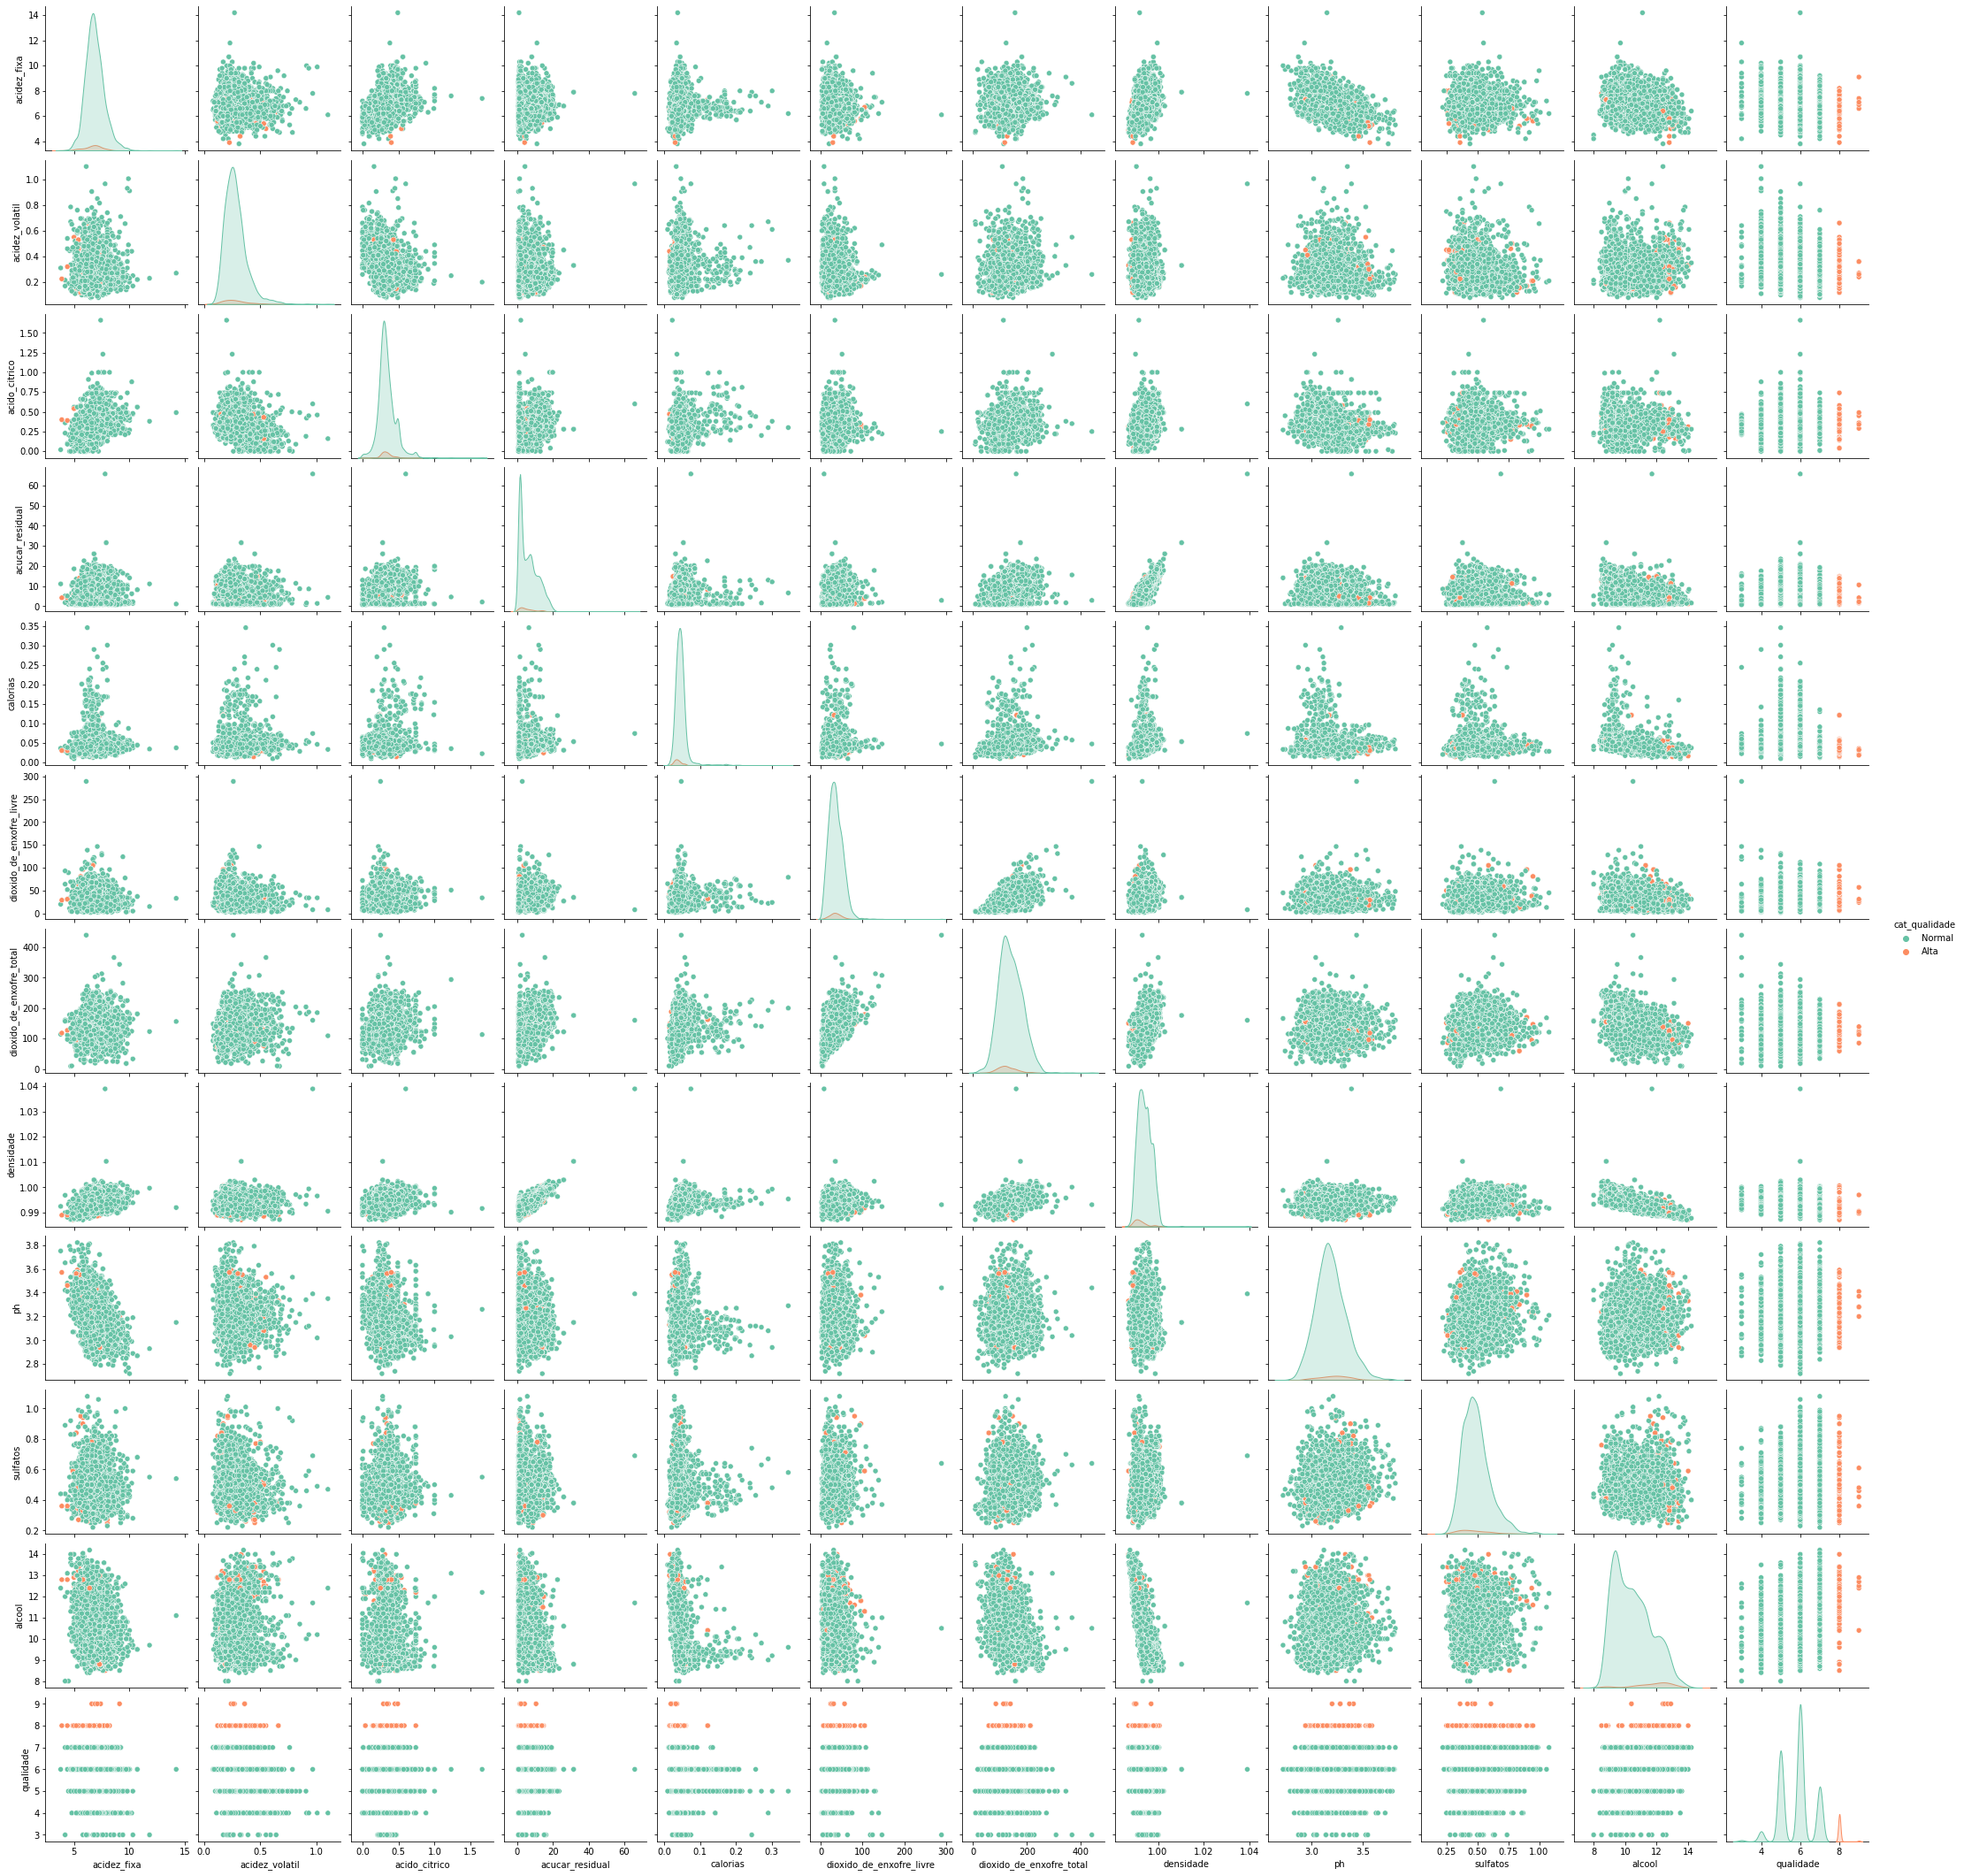

In [23]:
sns.pairplot(base, hue = "cat_qualidade", height = 2.5)

Agora, vamos plotar os gráficos das seguintes variáveis com coeficientes de correlação moderadas/altas para idenificar insights sobre as categorias de qualidade dos vinhos brancos.
- Densidade e Açucar Residual (Coeficiente de Correlação de 0.84)
- Acidez Fixa e Ph (Coeficiente de Correlação de -0.43)
- Acidez Fixa e Densidade
- Densidade e Álcool (Coeficiente de Correlação de -0,78)
- Densidade e Dióxido de Enxofre Total (Coeficiente de Correlação de 0.53)

Os vinhos brancos de melhor qualidade tendem a possuir um nível de açúcar residual mais baixo, maior que 0 e menor que 10 e pode-se perceber que a densidade deles é 0.99.

In [24]:
fig = px.scatter(base, x='acucar_residual', y='densidade', color='cat_qualidade', template="simple_white")
fig.show()

Os vinhos brancos de melhor qualidade tendem a possuir um nível de acidez fixa entre 6 e 8, podendo haver alguns menor que 6. Já o nível de Ph fica em torno de 3 a 3.4.

In [25]:
fig = px.scatter(base, x='acidez_fixa', y='ph', color='cat_qualidade', template="simple_white")
fig.show()

Os vinhos brancos de melhor qualidade tendem a possuir um nível de acidez fixa entre 6 e 8, e um nível de Densidade menor que 1, aproximademente, 0.99.

In [26]:
fig = px.scatter(base, x='acidez_fixa', y='densidade', color='cat_qualidade', template="simple_white")
fig.show()

Os vinhos brancos de Alta qualidade tendem a possuir um nível de Álcool entre 11 e 13, e um nível de Densidade de 0.99. Já os vinhos de qualidade baixa possuem níveis de alcool inferior a 11.

In [27]:
fig = px.scatter(base, x='alcool', y='densidade', color='cat_qualidade', template="simple_white")
fig.show()

Os vinhos brancos de alta qualidade tendem a possuir um nível de Dióxido de Enxofre Total entre 100 e 150. Já os vinhos brancos de qualidade normal, possuem níveis maiores que 150, podendo chegar a 250 e densidade mais próxima de 1.

In [28]:
fig = px.scatter(base, x='dioxido_de_enxofre_total', y='densidade', color='cat_qualidade', template="simple_white")
fig.show()

# Pré-processamento dos Dados

### Vamos analisar se existe algum valor Missing

In [6]:
# verificando nulls no dataset
base.isnull().sum()

acidez_fixa                 0
acidez_volatil              0
acido_citrico               0
acucar_residual             0
calorias                    0
dioxido_de_enxofre_livre    0
dioxido_de_enxofre_total    0
densidade                   0
ph                          0
sulfatos                    0
alcool                      0
qualidade                   0
dtype: int64

Já sabemos que este dataset não tem missings aparentes (o comando isnull() não indica nenhum valor missing inicialmente). 

# Transformações

* Se a distribuição é **Normal**, **Padronize**. Caso contrário, **Normalize**
* Na dúvida, use a **Normalização** 
* Explore os modelos com os dados:
    - sem Transformação
    - com a Padronização
    - com a Normalização 
    - veja se os resultados são significativamente diferentes e se o custo x benefício vale a pena.
* Como a **Padronização** resulta em valores positivos e negativos, pode ser interessante **Normalizar** os dados após a **Padronização**.
* É possível definir os valores de mínimo e máximo de acordo com o conhecimento no negócio (e não simplesmente se ater aos valores observados)

### Base sem Processamento

In [7]:
base.head()

acidez_fixa  acidez_volatil  acido_citrico  acucar_residual  calorias  \
0          7.0            0.27           0.36             20.7     0.045   
1          6.3            0.30           0.34              1.6     0.049   
2          8.1            0.28           0.40              6.9     0.050   
3          7.2            0.23           0.32              8.5     0.058   
4          7.2            0.23           0.32              8.5     0.058   

   dioxido_de_enxofre_livre  dioxido_de_enxofre_total  densidade    ph  \
0                      45.0                     170.0     1.0010  3.00   
1                      14.0                     132.0     0.9940  3.30   
2                      30.0                      97.0     0.9951  3.26   
3                      47.0                     186.0     0.9956  3.19   
4                      47.0                     186.0     0.9956  3.19   

   sulfatos  alcool  qualidade  
0      0.45     8.8          6  
1      0.49     9.5          6  
2      0.44    10.1          6  
3      0.40     9.9          6  
4      0.40     9.9          6

### Normalizando

Podemos normalizar os dados usando o objeto MinMaxScaler, do pacote Scikit-learn. A escala padrão é o intervalo [0,1], mas é possível especificar outro intervalo através do parâmetro feature_range, que será utilizado para todas as variáveis normalizadas.

In [8]:
# definindo o transformador como min max scaler
funcao_scaler = MinMaxScaler()

# transformando os dados
base_normalizada = funcao_scaler.fit_transform(base)
print(base_normalizada)

[[0.30769231 0.18627451 0.21686747 ... 0.26744186 0.12903226 0.5       ]
 [0.24038462 0.21568627 0.20481928 ... 0.31395349 0.24193548 0.5       ]
 [0.41346154 0.19607843 0.24096386 ... 0.25581395 0.33870968 0.5       ]
 ...
 [0.25961538 0.15686275 0.11445783 ... 0.27906977 0.22580645 0.5       ]
 [0.16346154 0.20588235 0.18072289 ... 0.18604651 0.77419355 0.66666667]
 [0.21153846 0.12745098 0.22891566 ... 0.11627907 0.61290323 0.5       ]]


### Padronizando

Para padronizar os dados, calcula-se a média estatística e o desvio padrão dos valores dos atributos, subtrai-se a média de cada valor e divide-se o resultado pelo desvio padrão.

A padronização exige que consigamos estimar com precisão a média e o desvio padrão dos valores observáveis. Recomenda-se estimar esses valores com base nos dados de treinamento, não no conjunto de dados inteiro.

Um valor é padronizado da seguinte maneira:

- média = soma (x) / contagem (x)
- desvio_ padrão = sqrt (soma ((x - média) ^ 2) / contagem (x))
- y = (x - média) / desvio padrão

Podemos padronizar os dados usando o objeto StandardScaler, do pacote Scikit-learn.

In [10]:
# definindo o transformador como standard scaler
funcao_scaler = StandardScaler()

# transformando os dados
base_padronizada = funcao_scaler.fit_transform(base)
print(base_padronizada)

[[ 1.72096961e-01 -8.17699008e-02  2.13280202e-01 ... -3.49184257e-01
  -1.39315246e+00  1.37870140e-01]
 [-6.57501128e-01  2.15895632e-01  4.80011213e-02 ...  1.34184656e-03
  -8.24275678e-01  1.37870140e-01]
 [ 1.47575110e+00  1.74519434e-02  5.43838363e-01 ... -4.36815783e-01
  -3.36667007e-01  1.37870140e-01]
 ...
 [-4.20473102e-01 -3.79435433e-01 -1.19159198e+00 ... -2.61552731e-01
  -9.05543789e-01  1.37870140e-01]
 [-1.60561323e+00  1.16673788e-01 -2.82557040e-01 ... -9.62604939e-01
   1.85757201e+00  1.26711420e+00]
 [-1.01304317e+00 -6.77100966e-01  3.78559282e-01 ... -1.48839409e+00
   1.04489089e+00  1.37870140e-01]]
